# 1. Setup & Imports

In [190]:
# ------------------ Data Manipulation ------------------
import pandas as pd          # DataFrame operations
import numpy as np           # Numerical computations

# ------------------ Visualization ------------------
import matplotlib.pyplot as plt  # Basic plotting
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting support
import seaborn as sns             # Statistical visualization

# ------------------ Statistics & Analysis ------------------
from scipy.stats import pearsonr    # Pearson correlation
import scipy.stats as stats         # General statistical tools
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF

# ------------------ Machine Learning & Scaling ------------------
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Normalization and standardization
from sklearn.cluster import KMeans                              # KMeans clustering
from sklearn.preprocessing import PolynomialFeatures            # Polynomial basis for regression
from sklearn.linear_model import LinearRegression               # Linear regression model

# ------------------ Optimization & Pareto Analysis ------------------
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting  # Pareto front identification

# ------------------ Geospatial Analysis ------------------
import geopandas as gpd         # Handling shapefiles and spatial data
import fiona                    # I/O support for geospatial formats
import pyogrio                  # Fast I/O for vector geodata
import rasterio                 # Raster data reading/writing
from rasterstats import zonal_stats  # Zonal statistics from rasters

# ------------------ Utility & System ------------------
import os                # File system interaction
import warnings          # Suppress warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

# ------------------ Pandas Display Settings ------------------
pd.options.display.float_format = '{:.2f}'.format         # Format float output
pd.set_option('display.max_columns', None)                # Show all columns

# ------------------ Matplotlib Settings ------------------
plt.rcParams['font.sans-serif'] = ['SimHei']              # Support Chinese characters
plt.rcParams['axes.unicode_minus'] = False                # Display minus signs correctly

# Inline plot display (only needed in notebooks)
%matplotlib inline

# 2. Data preprocess

In [191]:
df = pd.read_csv('../data/grid500_36cities.csv')
grid500 = df.copy()
print(grid500.shape)
grid500.head()

(196770, 48)


,Global_ID,City,NTL2023,NTL2023_focal,VIT202311,UHIDAY2020_07_inv,buildingCount,totalHeight,avgHeight,maxHeight,minHeight,heightRange,heightIndex,heightDensity,heightVariety,cornerCountTotal,basePerimeterTotal,basePerimeterAvg,basePerimeterMax,basePerimeterMin,shapeComplexity,compactness,baseAreaTotal,totalArea,areaVariance,buildingIntensity,avgBuildingArea,parcelArea,largestPatchIndex,shape3DIndex,SVF,balanceIndex,FAR,coverageRatio,FVC,permeableRatio,poiDensity,poiDiversity,streetRatio,roadDensity,intersectionDensity,cornerCountAvg,buildingProximity,buildingMinDist,buildingMaxDist,buildingDistAvg,buildingDistVar,cluster_label
0,0,Beijing,6.18,7.03,1649.86,0.00,31,93.00,3.00,3.00,3.00,0.00,0.03,0.00,0.00,180,6500.98,209.71,831.63,32.55,5.07,0.56,88704.58,88704.58,50961857.70,0.35,2861.44,132998.25,0.47,0.01,0.80,234.60,0.35,0.35,0.84,0.89,4.00,0.00,0.20,5,1,5.81,52.56,14.99,620.94,268.09,2565.57,5.00
1,1,Beijing,5.74,7.23,155.86,0.00,29,87.00,3.00,3.00,3.00,0.00,0.03,0.00,0.00,149,3810.39,131.39,272.14,15.33,5.17,0.62,33119.49,33119.49,1261729.88,0.13,1142.05,196625.22,0.67,0.26,0.89,35.66,0.13,0.13,0.86,0.94,12.00,0.64,0.20,7,1,5.14,34.22,6.82,594.16,300.09,2010.84,5.00
2,2,Beijing,11.32,13.62,57.14,0.00,22,66.00,3.00,3.00,3.00,0.00,0.05,0.00,0.00,117,3645.40,165.70,668.26,28.73,4.92,0.56,51092.86,51092.86,30358745.83,0.20,2322.40,132197.31,0.53,0.01,0.90,151.50,0.20,0.20,0.88,0.93,0.00,0.00,0.20,1,0,5.32,47.90,17.34,610.84,283.84,2044.73,5.00
3,3,Beijing,11.73,14.36,243.57,0.00,8,24.00,3.00,3.00,3.00,0.00,0.12,0.00,0.00,42,1147.60,143.45,283.01,75.66,5.70,0.60,8534.61,8534.61,958399.89,0.03,1066.83,205685.37,0.82,0.02,0.95,15.54,0.03,0.03,0.93,0.98,0.00,0.00,0.20,3,1,5.25,35.93,13.49,474.17,232.31,1896.14,5.00
4,4,Beijing,8.45,9.19,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,99.15,0.00,0.00,0.98,0.00,0.00,0.00,0.82,0.98,16.00,0.69,0.00,1,1,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [192]:
grid500.describe()

,Global_ID,NTL2023,NTL2023_focal,VIT202311,UHIDAY2020_07_inv,buildingCount,totalHeight,avgHeight,maxHeight,minHeight,heightRange,heightIndex,heightDensity,heightVariety,cornerCountTotal,basePerimeterTotal,basePerimeterAvg,basePerimeterMax,basePerimeterMin,shapeComplexity,compactness,baseAreaTotal,totalArea,areaVariance,buildingIntensity,avgBuildingArea,parcelArea,largestPatchIndex,shape3DIndex,SVF,balanceIndex,FAR,coverageRatio,FVC,permeableRatio,poiDensity,poiDiversity,streetRatio,roadDensity,intersectionDensity,cornerCountAvg,buildingProximity,buildingMinDist,buildingMaxDist,buildingDistAvg,buildingDistVar,cluster_label
count,196770.00,189742.00,194941.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196770.00,196181.00
mean,98384.50,28.88,28.65,1403.85,-0.98,46.33,886.66,16.45,30.23,9.56,20.67,0.10,0.00,0.30,312.91,4921.79,111.74,346.15,22.72,4.53,0.53,32968.43,214936.43,191737677.31,0.86,5425.70,179593.23,0.50,183.56,0.86,253.75,0.86,0.13,0.61,0.88,193.65,1.07,0.76,4.57,5.56,6.14,39.98,15.07,496.36,202.13,2052.43,5.25
std,56802.75,19.36,17.87,1816.75,1.00,50.88,1033.64,8.75,24.27,4.93,23.96,0.17,0.00,0.28,351.75,4245.87,60.88,230.94,35.95,1.43,0.17,27496.66,209917.26,2296345807.79,0.84,7800.03,80390.97,0.29,49969.18,0.11,311.25,0.84,0.11,0.20,0.10,381.59,0.81,0.57,6.48,12.88,2.72,36.56,31.77,214.36,88.29,1594.74,1.78
min,0.00,0.00,0.00,0.00,-4.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,49192.25,15.06,15.64,202.00,-1.68,11.00,143.00,12.00,12.00,6.00,0.00,0.02,0.00,0.00,69.00,1367.52,82.58,200.40,4.30,4.56,0.53,8580.56,35638.34,3379478.07,0.14,1850.67,129826.65,0.29,0.00,0.79,51.04,0.14,0.03,0.51,0.81,4.00,0.00,0.39,1.00,0.00,5.25,26.39,5.33,453.60,175.29,1205.72,5.00
50%,98384.50,25.85,26.01,720.00,-0.89,34.00,549.00,16.57,27.00,12.00,15.00,0.04,0.00,0.28,219.00,4146.83,110.59,317.59,14.05,4.82,0.57,28759.95,155433.90,20457775.16,0.62,4008.05,221947.35,0.48,0.01,0.89,176.35,0.62,0.12,0.62,0.90,40.00,1.24,0.69,3.00,2.00,5.91,34.87,8.94,585.55,235.68,1919.63,5.00
75%,147576.75,38.67,38.17,1987.86,0.00,65.00,1306.00,21.95,40.00,12.00,28.00,0.09,0.01,0.42,442.00,7476.49,137.25,460.66,28.45,5.08,0.62,51589.97,345413.85,74388762.13,1.38,6715.60,238486.10,0.71,0.04,0.95,346.43,1.38,0.21,0.74,0.96,208.00,1.82,1.05,6.00,6.00,7.00,45.64,14.69,645.12,263.03,2631.27,7.00
max,196769.00,465.96,348.37,68494.71,5.13,1189.00,22354.50,130.50,535.00,112.00,532.00,1.00,0.09,2.87,8619.00,50912.47,1689.25,5146.21,1689.25,39.49,0.99,226640.62,3672930.95,662000000000.00,14.69,664544.83,250000.00,1.00,21048158.03,1.00,12613.17,14.69,0.91,1.00,1.00,10124.00,2.48,19.56,376.00,2254.00,99.47,687.04,687.04,706.01,358.32,21993.84,7.00


## 2.1 Performance indicators

In [193]:
targets = ['NTL2023_focal', 'VIT202311', 'UHIDAY2020_07_inv']

In [194]:
# dropna
print(grid500[targets].isnull().sum())
grid500 = grid500.dropna(subset=targets)

NTL2023_focal        1829
VIT202311               0
UHIDAY2020_07_inv       0
dtype: int64


In [195]:
grid500.describe()

,Global_ID,NTL2023,NTL2023_focal,VIT202311,UHIDAY2020_07_inv,buildingCount,totalHeight,avgHeight,maxHeight,minHeight,heightRange,heightIndex,heightDensity,heightVariety,cornerCountTotal,basePerimeterTotal,basePerimeterAvg,basePerimeterMax,basePerimeterMin,shapeComplexity,compactness,baseAreaTotal,totalArea,areaVariance,buildingIntensity,avgBuildingArea,parcelArea,largestPatchIndex,shape3DIndex,SVF,balanceIndex,FAR,coverageRatio,FVC,permeableRatio,poiDensity,poiDiversity,streetRatio,roadDensity,intersectionDensity,cornerCountAvg,buildingProximity,buildingMinDist,buildingMaxDist,buildingDistAvg,buildingDistVar,cluster_label
count,194941.00,189742.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194352.00
mean,98137.51,28.88,28.65,1414.14,-0.99,46.70,893.91,16.53,30.42,9.58,20.83,0.10,0.00,0.30,315.42,4959.32,112.06,347.82,22.65,4.55,0.54,33192.68,216494.27,191423545.70,0.87,5437.01,180006.93,0.50,185.28,0.86,255.17,0.87,0.13,0.62,0.88,195.28,1.08,0.77,4.60,5.59,6.16,40.04,15.03,499.16,203.23,2063.94,5.26
std,56862.94,19.36,17.87,1821.23,1.00,50.96,1035.48,8.72,24.26,4.91,23.99,0.17,0.00,0.28,352.35,4245.40,60.43,230.34,35.73,1.40,0.17,27474.13,210010.02,2300870309.71,0.84,7776.02,80149.49,0.29,50203.04,0.11,311.22,0.84,0.11,0.19,0.10,382.88,0.81,0.57,6.46,12.92,2.70,36.33,31.56,212.18,87.42,1591.36,1.77
min,0.00,0.00,0.00,0.00,-4.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,49033.00,15.06,15.64,206.86,-1.69,12.00,144.00,12.00,12.00,6.00,0.00,0.02,0.00,0.00,72.00,1417.38,83.02,202.45,4.35,4.57,0.53,8888.17,37241.51,3519241.57,0.15,1875.57,131267.14,0.29,0.00,0.79,52.87,0.15,0.04,0.51,0.81,4.00,0.00,0.40,1.00,0.00,5.26,26.51,5.37,459.16,177.27,1230.33,5.00
50%,97800.00,25.85,26.01,731.14,-0.91,35.00,559.00,16.67,27.00,12.00,15.00,0.04,0.00,0.28,222.00,4200.02,110.75,319.04,14.07,4.82,0.57,29057.71,157756.72,20726892.83,0.63,4027.77,222107.39,0.48,0.01,0.88,178.28,0.63,0.12,0.62,0.90,40.00,1.26,0.70,3.00,2.00,5.92,34.90,8.95,586.78,236.19,1926.76,5.00
75%,147135.00,38.67,38.17,2003.43,0.00,65.00,1315.00,21.99,40.00,12.00,28.00,0.09,0.01,0.43,445.00,7512.92,137.30,461.66,28.38,5.08,0.62,51784.69,347326.83,74777609.98,1.39,6726.97,238506.86,0.71,0.04,0.95,347.80,1.39,0.21,0.74,0.96,212.00,1.82,1.05,6.00,6.00,7.02,45.61,14.67,645.52,263.21,2637.05,7.00
max,196769.00,465.96,348.37,68494.71,5.13,1189.00,22354.50,130.50,535.00,112.00,532.00,1.00,0.09,2.87,8619.00,50912.47,1689.25,5146.21,1689.25,39.49,0.99,226640.62,3672930.95,662000000000.00,14.69,664544.83,250000.00,1.00,21048158.03,1.00,12613.17,14.69,0.91,1.00,1.00,10124.00,2.48,19.56,376.00,2254.00,99.47,687.04,687.04,706.01,358.32,21993.84,7.00


In [197]:
# log1p for NTL, VIT
for col in ['NTL2023_focal', 'VIT202311']:
    grid500[f'log_{col}'] = np.log1p(grid500[col])

In [198]:
targets_processed = ['log_NTL2023_focal', 'log_VIT202311', 'UHIDAY2020_07_inv']

In [199]:
grid500[targets_processed].describe()

,log_NTL2023_focal,log_VIT202311,UHIDAY2020_07_inv
count,194941.00,194941.00,194941.00
mean,3.20,6.22,-0.99
std,0.64,1.90,1.00
min,0.00,0.00,-4.60
25%,2.81,5.34,-1.69
50%,3.30,6.60,-0.91
75%,3.67,7.60,0.00
max,5.86,11.13,5.13


## 2.2 Urban form indicators (TBC)

In [200]:
features = [
    'buildingCount', 'totalHeight', 'avgHeight', 'basePerimeterTotal',
    'basePerimeterAvg', 'compactness', 'baseAreaTotal', 'totalArea',
    'buildingIntensity', 'avgBuildingArea', 'FAR', 'coverageRatio',
    'roadDensity', 'intersectionDensity', 'poiDensity', 'poiDiversity',
    'FVC', 'permeableRatio', 'maxHeight', 'minHeight', 'heightRange', 'heightIndex',
    'heightDensity', 'heightVariety', 'cornerCountTotal', 'basePerimeterMax',
    'basePerimeterMin', 'shapeComplexity', 'areaVariance', 'parcelArea',
    'largestPatchIndex', 'shape3DIndex', 'balanceIndex', 'cornerCountAvg',
    'buildingProximity', 'buildingMinDist', 'buildingMaxDist',
    'buildingDistAvg', 'buildingDistVar', 'SVF', 'streetRatio'
]

In [201]:
print(grid500[features].isnull().sum())

buildingCount          0
totalHeight            0
avgHeight              0
basePerimeterTotal     0
basePerimeterAvg       0
compactness            0
baseAreaTotal          0
totalArea              0
buildingIntensity      0
avgBuildingArea        0
FAR                    0
coverageRatio          0
roadDensity            0
intersectionDensity    0
poiDensity             0
poiDiversity           0
FVC                    0
permeableRatio         0
maxHeight              0
minHeight              0
heightRange            0
heightIndex            0
heightDensity          0
heightVariety          0
cornerCountTotal       0
basePerimeterMax       0
basePerimeterMin       0
shapeComplexity        0
areaVariance           0
parcelArea             0
largestPatchIndex      0
shape3DIndex           0
balanceIndex           0
cornerCountAvg         0
buildingProximity      0
buildingMinDist        0
buildingMaxDist        0
buildingDistAvg        0
buildingDistVar        0
SVF                    0


In [202]:
# Extract the selected feature subset
df_feat = grid500[features].copy()

# Identify skewed features for transformation
skewness = df_feat.skew()
skewed_cols = skewness[skewness > 1].index.tolist()  # Skewness > 1 = strongly right-skewed
print(skewed_cols)

['buildingCount', 'totalHeight', 'basePerimeterTotal', 'basePerimeterAvg', 'totalArea', 'buildingIntensity', 'avgBuildingArea', 'FAR', 'roadDensity', 'intersectionDensity', 'poiDensity', 'maxHeight', 'heightRange', 'heightIndex', 'heightDensity', 'heightVariety', 'cornerCountTotal', 'basePerimeterMax', 'basePerimeterMin', 'areaVariance', 'shape3DIndex', 'balanceIndex', 'cornerCountAvg', 'buildingProximity', 'buildingMinDist', 'buildingDistVar', 'streetRatio']


- areaVariance
- shape3DIndex

# 3. PPF

## 3.1 Data exploration

In [203]:
targets_processed = ['log_NTL2023_focal', 'log_VIT202311', 'UHIDAY2020_07_inv']
df_targets = grid500.dropna(subset=['cluster_label'] + targets_processed).copy()

In [204]:
def compute_correlations(data, cols):
    corr_results = []
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            r, p = stats.pearsonr(data[cols[i]], data[cols[j]])
            corr_results.append({
                'var1': cols[i],
                'var2': cols[j],
                'pearson_r': r,
                'p_value': p
            })
    return pd.DataFrame(corr_results)

In [205]:
# correlation
grouped_results = []
for cluster, group in df_targets.groupby('cluster_label'):
    corrs = compute_correlations(group, ['log_NTL2023_focal', 'log_VIT202311', 'UHIDAY2020_07_inv'])
    corrs['cluster_label'] = cluster
    grouped_results.append(corrs)

grouped_df = pd.concat(grouped_results, ignore_index=True)

global_corrs = compute_correlations(df_targets, ['log_NTL2023_focal', 'log_VIT202311', 'UHIDAY2020_07_inv'])
global_corrs['cluster_label'] = 'Global'

final_results = pd.concat([grouped_df, global_corrs], ignore_index=True)
final_results

,var1,var2,pearson_r,p_value,cluster_label
0,log_NTL2023_focal,log_VIT202311,0.63,0.00,0.00
1,log_NTL2023_focal,UHIDAY2020_07_inv,-0.44,0.00,0.00
2,log_VIT202311,UHIDAY2020_07_inv,-0.49,0.00,0.00
3,log_NTL2023_focal,log_VIT202311,0.44,0.00,1.00
4,log_NTL2023_focal,UHIDAY2020_07_inv,-0.35,0.00,1.00
5,log_VIT202311,UHIDAY2020_07_inv,-0.34,0.00,1.00
6,log_NTL2023_focal,log_VIT202311,0.42,0.00,2.00
7,log_NTL2023_focal,UHIDAY2020_07_inv,-0.39,0.00,2.00
8,log_VIT202311,UHIDAY2020_07_inv,-0.30,0.00,2.00
9,log_NTL2023_focal,log_VIT202311,0.48,0.00,3.00


In [206]:
# merge corr + sig
final_results['pair'] = final_results['var1'] + ' vs ' + final_results['var2']

df_simple = final_results[['pair', 'cluster_label', 'pearson_r', 'p_value']]

df_pivot_r = df_simple.pivot(index='pair', columns='cluster_label', values='pearson_r')
df_pivot_p = df_simple.pivot(index='pair', columns='cluster_label', values='p_value')

def sig_symbol(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

df_sig = df_pivot_p.applymap(sig_symbol)
df_r_sig = df_pivot_r.round(2).astype(str) + df_sig
df_r_sig

cluster_label,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,Global
pair,,,,,,,,,
log_NTL2023_focal vs UHIDAY2020_07_inv,-0.44**,-0.35***,-0.39***,-0.39***,-0.4***,-0.36***,-0.43***,-0.37***,-0.38***
log_NTL2023_focal vs log_VIT202311,0.63***,0.44***,0.42***,0.48***,0.44***,0.45***,0.52***,0.47***,0.47***
log_VIT202311 vs UHIDAY2020_07_inv,-0.49***,-0.34***,-0.3***,-0.34***,-0.29***,-0.28***,-0.31***,-0.27***,-0.3***


## 3.2 Three-dimensional scatter plot

In [207]:
df_clean = grid500[['Global_ID'] + targets_processed].dropna()

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_clean[targets_processed])

df_scaled = pd.DataFrame(scaled_values, columns=targets_processed)
df_scaled['Global_ID'] = df_clean['Global_ID'].values

# keep Global_ID as first column for readability
df_scaled = df_scaled[['Global_ID'] + targets_processed]

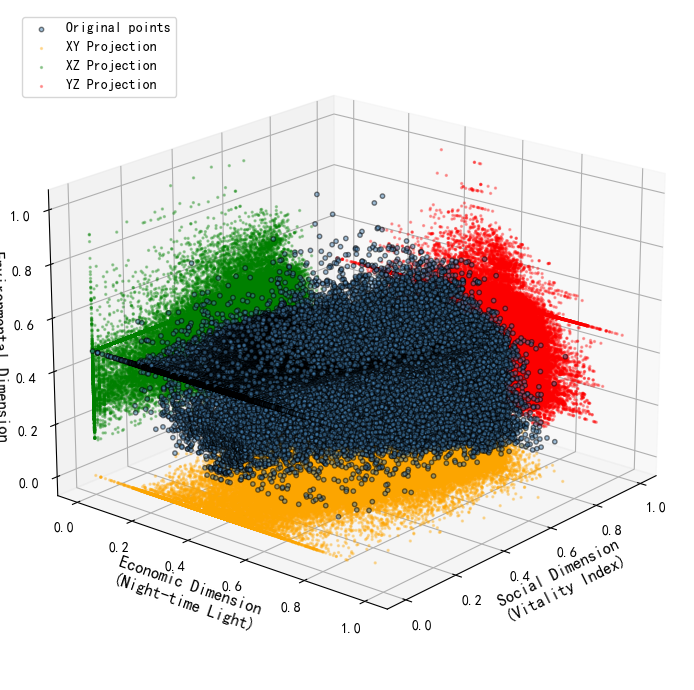

In [208]:
# Create 3D figure
fig_3d = plt.figure(figsize=(10, 7))
ax = fig_3d.add_subplot(111, projection='3d')

# Input data vectors
x = df_scaled['log_VIT202311'].values            # Social dimension (Vitality Index)
y = df_scaled['log_NTL2023_focal'].values              # Economic dimension (Nighttime Light)
z = df_scaled['UHIDAY2020_07_inv'].values           # Environmental dimension (Inverted UHI)

# Main 3D scatter plot
ax.scatter(x, y, z, c='steelblue', alpha=0.5, s=10, edgecolors='black', label='Original points')

# Compute min and max values for projection planes
x_min, y_min, z_min = np.min(x), np.min(y), np.min(z)
x_max, y_max, z_max = np.max(x), np.max(y), np.max(z)

# XY-plane projection (Z fixed)
ax.scatter(x, y, np.full_like(x, z_min), c='orange', alpha=0.3, s=2, label='XY Projection')

# XZ-plane projection (Y fixed)
ax.scatter(x, np.full_like(y, y_min), z, c='green', alpha=0.3, s=2, label='XZ Projection')

# YZ-plane projection (X fixed)
ax.scatter(np.full_like(x, x_max), y, z, c='red', alpha=0.3, s=2, label='YZ Projection')

# Axis labels (English with dimension meaning)
ax.set_xlabel('Social Dimension\n(Vitality Index)', fontsize=12)
ax.set_ylabel('Economic Dimension\n(Night-time Light)', fontsize=12)
ax.set_zlabel('Environmental Dimension\n(UHI)', fontsize=12)

# Title and axis adjustments
# ax.set_title(f'3D Scatter Plot of Urban Sustainability Dimensions: {title}', fontsize=14)

# Optional: Invert X-axis for better visual alignment
ax.invert_xaxis()
# ax.invert_zaxis()  # Optional

# Set 3D view angle
ax.view_init(elev=20, azim=40)

# Add legend
ax.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

## 3.3 Pareto optimal

In [209]:
# Select the three dimensions (already normalized)
data = df_scaled[['log_VIT202311', 'log_NTL2023_focal', 'UHIDAY2020_07_inv']].values

# Initialize a boolean mask for Pareto optimal points
is_pareto = np.ones(data.shape[0], dtype=bool)

# Loop over all points
for i, candidate in enumerate(data):
    # Keep candidate if no other point dominates it
    is_dominated = np.any(np.all(data >= candidate, axis=1) & np.any(data > candidate, axis=1))
    if is_dominated:
        is_pareto[i] = False

# Extract Pareto-optimal subset
df_pareto = df_scaled[is_pareto].copy()

print(f"Number of Pareto-optimal points: {df_pareto.shape[0]}")

Number of Pareto-optimal points: 94


In [210]:
top_k = 0.1  # top 10%

thresholds = df_scaled[['log_VIT202311', 'log_NTL2023_focal', 'UHIDAY2020_07_inv']].quantile(1 - top_k)

# Keep only samples that are in the top 10% of all dimensions
condition = (
    (df_scaled['log_VIT202311'] >= thresholds['log_VIT202311']) &
    (df_scaled['log_NTL2023_focal'] >= thresholds['log_NTL2023_focal']) &
    (df_scaled['UHIDAY2020_07_inv'] >= thresholds['UHIDAY2020_07_inv'])
)

df_topk = df_scaled[condition]
print(f"Number of points that are in the top 10% of all dimensions: {df_topk.shape[0]}")

Number of points that are in the top 10% of all dimensions: 199


### Clustering + Pareto filtering

- Computational Efficiency: Performing Pareto filtering directly on 190,000+ samples is computationally expensive. Clustering reduces the problem size to a manageable scale (e.g., 500 points).
- Noise Reduction: Clustering smooths out local noise and minor fluctuations, helping highlight robust, structurally meaningful Pareto-optimal patterns rather than outliers.
- Improved Surface Fitting: Fitting a surface to a smaller, cleaner set of optimal points improves the quality and interpretability of the Pareto frontier approximation.
- Scalable Evaluation Framework: Once the Pareto front is established from cluster centers, it can be used to evaluate the entire dataset efficiently by calculating distances to the frontier.

### Determine k

In [211]:
df_clean = grid500[['Global_ID'] + targets_processed].dropna()

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_clean[targets_processed])

df_scaled = pd.DataFrame(scaled_values, columns=targets_processed)
df_scaled['Global_ID'] = df_clean['Global_ID'].values

# keep Global_ID as first column for readability
df_scaled = df_scaled[['Global_ID'] + targets_processed]

# Store Global_ID for mapping later
global_ids = df_scaled['Global_ID'].values

# Normalize selected features for clustering
scaler = StandardScaler()
X_std = scaler.fit_transform(df_scaled[targets_processed].values)

In [212]:
# k = 500
k = 500
kmeans = KMeans(n_clusters=k, random_state=42).fit(X_std)
centers_std = kmeans.cluster_centers_

# Convert cluster centers back to original scale
centers_original = scaler.inverse_transform(centers_std)

# Perform Pareto filtering on cluster centers
F_inv = -1 * centers_original  # convert to minimization
nds = NonDominatedSorting()
pareto_idx = nds.do(F_inv, only_non_dominated_front=True)

# Extract Pareto-optimal centers
pareto_centers = centers_original[pareto_idx]

# Create DataFrame for output
df_pareto_centers = pd.DataFrame(pareto_centers, columns=targets_processed)

# Assign fake Global_IDs for tracking if needed
df_pareto_centers['Global_ID'] = [f"cluster_{i}" for i in pareto_idx]
df_pareto_centers = df_pareto_centers[['Global_ID'] + targets_processed]

print(f"Selected {len(df_pareto_centers)} Pareto-optimal cluster centers.")

Selected 34 Pareto-optimal cluster centers.


In [214]:
df_pareto_centers

,Global_ID,log_NTL2023_focal,log_VIT202311,UHIDAY2020_07_inv
0,cluster_0,0.66,0.72,0.55
1,cluster_21,0.54,0.71,0.65
2,cluster_31,0.78,0.55,0.47
3,cluster_49,0.59,0.48,0.70
4,cluster_94,0.62,0.74,0.64
5,cluster_100,0.72,0.74,0.47
6,cluster_120,0.75,0.77,0.29
7,cluster_137,0.79,0.75,0.17
8,cluster_146,0.71,0.80,0.33
9,cluster_148,0.77,0.43,0.47


### Continue to explore different k

In [213]:
# k = 1000
k = 1000
kmeans = KMeans(n_clusters=k, random_state=42).fit(X_std)
centers_std = kmeans.cluster_centers_

# Convert cluster centers back to original scale
centers_original = scaler.inverse_transform(centers_std)

# Perform Pareto filtering on cluster centers
F_inv = -1 * centers_original  # convert to minimization
nds = NonDominatedSorting()
pareto_idx = nds.do(F_inv, only_non_dominated_front=True)

# Extract Pareto-optimal centers
pareto_centers = centers_original[pareto_idx]

# Create DataFrame for output
df_pareto_centers = pd.DataFrame(pareto_centers, columns=targets_processed)

# Assign fake Global_IDs for tracking if needed
df_pareto_centers['Global_ID'] = [f"cluster_{i}" for i in pareto_idx]
df_pareto_centers = df_pareto_centers[['Global_ID'] + targets_processed]

print(f"Selected {len(df_pareto_centers)} Pareto-optimal cluster centers.")

KeyboardInterrupt: 

In [ ]:
# k = 
k = 
kmeans = KMeans(n_clusters=k, random_state=42).fit(X_std)
centers_std = kmeans.cluster_centers_

# Convert cluster centers back to original scale
centers_original = scaler.inverse_transform(centers_std)

# Perform Pareto filtering on cluster centers
F_inv = -1 * centers_original  # convert to minimization
nds = NonDominatedSorting()
pareto_idx = nds.do(F_inv, only_non_dominated_front=True)

# Extract Pareto-optimal centers
pareto_centers = centers_original[pareto_idx]

# Create DataFrame for output
df_pareto_centers = pd.DataFrame(pareto_centers, columns=targets_processed)

# Assign fake Global_IDs for tracking if needed
df_pareto_centers['Global_ID'] = [f"cluster_{i}" for i in pareto_idx]
df_pareto_centers = df_pareto_centers[['Global_ID'] + targets_processed]

print(f"Selected {len(df_pareto_centers)} Pareto-optimal cluster centers.")

### k = 500, 34 Pareto-optimal cluster centers

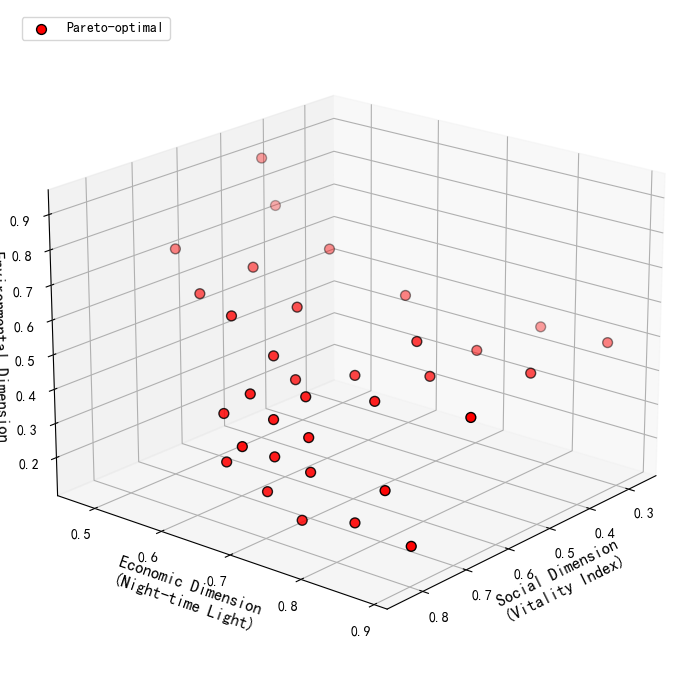

<Figure size 640x480 with 0 Axes>

In [215]:
# Create 3D figure
fig_3d = plt.figure(figsize=(10, 7))
ax = fig_3d.add_subplot(111, projection='3d')

# Input data vectors
x = df_scaled['log_VIT202311'].values            # Social dimension (Vitality Index)
y = df_scaled['log_NTL2023_focal'].values              # Economic dimension (Nighttime Light)
z = df_scaled['UHIDAY2020_07_inv'].values           # Environmental dimension (Inverted UHI)

# Plot Pareto front
ax.scatter(df_pareto_centers['log_VIT202311'], df_pareto_centers['log_NTL2023_focal'], df_pareto_centers['UHIDAY2020_07_inv'],
           color='red', s=50, label='Pareto-optimal', edgecolors='black')

# Main 3D scatter plot
# ax.scatter(x, y, z, c='steelblue', alpha=0.2, s=5, edgecolors='black', label='Original points')

# Axis labels
ax.set_xlabel('Social Dimension\n(Vitality Index)', fontsize=12)
ax.set_ylabel('Economic Dimension\n(Night-time Light)', fontsize=12)
ax.set_zlabel('Environmental Dimension\n(UHI)', fontsize=12)

# Title and axis adjustments
# ax.set_title(f'3D Scatter Plot of Urban Sustainability Dimensions: {title}', fontsize=14)

# Optional: Invert X-axis for better visual alignment
# ax.invert_xaxis()
# ax.invert_zaxis()  # Optional

# Set 3D view angle
ax.view_init(elev=20, azim=40)

# Add legend
ax.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

ax.set_xlabel('Social Dimension (log_VIT202311)')
ax.set_ylabel('Economic Dimension (log_NTL2023_focal)')
ax.set_zlabel('Environmental Dimension (UHIDAY2020_07_inv)')
ax.set_title('3D Pareto Front of Urban Grid Units')
ax.legend()
plt.tight_layout()
plt.show()

## 3.4 PPF fit & Efficiency calculate

### Polynomial

In [216]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

XY = df_pareto_centers[['log_VIT202311', 'log_NTL2023_focal']].values
z = df_pareto_centers['UHIDAY2020_07_inv'].values

poly = PolynomialFeatures(degree=3)
XY_poly = poly.fit_transform(XY)

reg = LinearRegression()
reg.fit(XY_poly, z)

# Print formula
coefs = reg.coef_
intercept = reg.intercept_
feature_names = poly.get_feature_names_out(['x', 'y'])

equation = f"{intercept:.4f} + " + " + ".join([f"{coef:.4f}*{name}" for coef, name in zip(coefs, feature_names)])
print("Fitted polynomial surface (z = f(x,y)):")
print("z =", equation)

Fitted polynomial surface (z = f(x,y)):
z = 10.6773 + 0.0000*1 + -39.4846*x + -8.8816*y + 35.4437*x^2 + 58.6977*x y + -14.6458*y^2 + -10.3564*x^3 + -27.5984*x^2 y + -20.1711*x y^2 + 13.6048*y^3


In [226]:
from scipy.spatial import KDTree

XY_all = df_scaled[['log_VIT202311', 'log_NTL2023_focal']].values
z_real = df_scaled['UHIDAY2020_07_inv'].values

XY_all_poly = poly.transform(XY_all)
z_hat = reg.predict(XY_all_poly)

distance_poly = np.sqrt((XY_all[:, 0] - XY_all[:, 0])**2 + 
                        (XY_all[:, 1] - XY_all[:, 1])**2 + 
                        (z_real - z_hat)**2)

D_max_poly = distance_poly.max()
eff_poly = 1 - (distance_poly / D_max_poly)

df_eff = df_scaled.copy()
df_eff['Efficiency_Poly'] = eff_poly

### RBFInterpolator

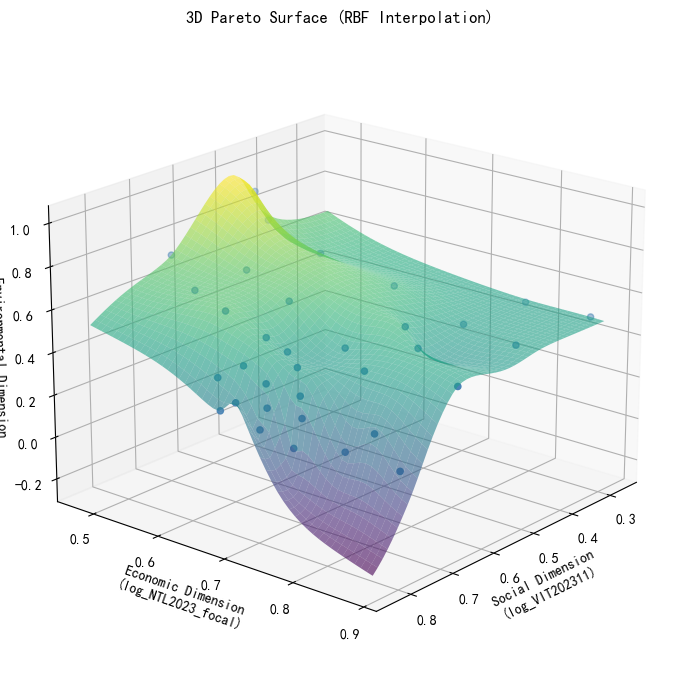

In [227]:
from scipy.interpolate import RBFInterpolator
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract 3D coordinates from Pareto points
X = df_pareto_centers[['log_VIT202311', 'log_NTL2023_focal', 'UHIDAY2020_07_inv']].values

# Step 2: Fit RBF interpolator on 3D point cloud
# We fit z as a function of (x, y), so z = f(x, y)
XY = X[:, :2]  # [x, y]
z = X[:, 2]    # z

rbf_model = RBFInterpolator(XY, z, kernel='thin_plate_spline')  # or 'multiquadric', 'linear'

# Step 3: Create prediction grid for visualization
x_range = np.linspace(X[:,0].min(), X[:,0].max(), 50)
y_range = np.linspace(X[:,1].min(), X[:,1].max(), 50)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
grid_points = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T

Z_pred = rbf_model(grid_points).reshape(X_grid.shape)

# Step 4: Plot original points + surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter original points
ax.scatter(X[:,0], X[:,1], X[:,2], c='steelblue', s=20, label='Pareto-optimal points')
ax.view_init(elev=20, azim=40)

# Plot fitted surface
ax.plot_surface(X_grid, Y_grid, Z_pred, cmap='viridis', alpha=0.6)

ax.set_xlabel('Social Dimension\n(log_VIT202311)')
ax.set_ylabel('Economic Dimension\n(log_NTL2023_focal)')
ax.set_zlabel('Environmental Dimension\n(UHIDAY2020_07_inv)')
ax.set_title('3D Pareto Surface (RBF Interpolation)')
plt.tight_layout()
plt.show()

In [228]:
from scipy.spatial import KDTree
import numpy as np
import pandas as pd

# Step 1: Prepare all original 3D points (e.g. full dataset)
features = ['log_VIT202311', 'log_NTL2023_focal', 'UHIDAY2020_07_inv']
data_points = df_scaled[features].dropna().values

# Step 2: Generate dense meshgrid on XY plane to sample fitted surface
x_range = np.linspace(data_points[:,0].min(), data_points[:,0].max(), 100)
y_range = np.linspace(data_points[:,1].min(), data_points[:,1].max(), 100)
Xg, Yg = np.meshgrid(x_range, y_range)
XY_grid = np.vstack([Xg.ravel(), Yg.ravel()]).T

# Step 3: Predict Z from RBF surface (you must have fitted this already)
Zg = rbf_model(XY_grid)
surface_points = np.hstack([XY_grid, Zg.reshape(-1,1)])  # shape = (n, 3)

# Step 4: Build KDTree from surface points
tree = KDTree(surface_points)

# Step 5: Query nearest distances for all actual points to surface
distances, indices = tree.query(data_points)

# Step 6: Normalize into efficiency scores
D_max = distances.max()
efficiencies = 1 - (distances / D_max)

# Step 7: Add back to dataframe
df_eff['Distance_RBF'] = distances
df_eff['Efficiency_RBF'] = efficiencies

In [229]:
df_eff.describe()

,Global_ID,log_NTL2023_focal,log_VIT202311,UHIDAY2020_07_inv,Efficiency_Poly,Distance_RBF,Efficiency_RBF
count,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00
mean,98137.51,0.55,0.56,0.37,0.95,0.17,0.68
std,56862.94,0.11,0.17,0.10,0.08,0.08,0.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,49033.00,0.48,0.48,0.30,0.96,0.11,0.57
50%,97800.00,0.56,0.59,0.38,0.97,0.16,0.69
75%,147135.00,0.63,0.68,0.47,0.98,0.22,0.79
max,196769.00,1.00,1.00,1.00,1.00,0.52,1.00


### Comparison of Efficiency Metrics (Polynomial vs. RBF Surface)

- **Efficiency_Poly** (from 3rd-order polynomial surface):
  - Provides a closed-form analytical expression for the Pareto frontier.
  - Distribution is highly concentrated near 0.96–0.98 (mean = 0.95, std = 0.08).
  - Tends to over-smooth and may underestimate deviations for underperforming units.
  - Useful for interpretability and model simplicity.

- **Efficiency_RBF** (from RBF-interpolated surface):
  - Captures complex nonlinear relationships with better surface fidelity.
  - Shows greater variability (mean = 0.68, std = 0.16), enabling more nuanced performance differentiation.
  - More robust for identifying outliers and high-performing areas.
  - Preferred when accuracy and spatial heterogeneity are critical.

- **Recommendation**:
  - Use `Efficiency_RBF` for detailed performance diagnostics and clustering.
  - Use `Efficiency_Poly` when analytical simplicity and transparency are prioritized.
  - Consider reporting both metrics to balance interpretability and accuracy.

- **Decision**:
  - Use `Efficiency_RBF`.

## Save results

In [233]:
# Merge efficiency results back to original grid500 dataframe using Global_ID
grid500_with_eff = grid500.merge(
    df_eff[['Global_ID', 'Efficiency_RBF', 'Efficiency_Poly']],
    on='Global_ID',
    how='left'
)

# Save to CSV
grid500_with_eff.to_csv("../data/grid500_36cities_with_eff.csv", index=False)

In [231]:
grid500_with_eff.describe()

,Global_ID,NTL2023,NTL2023_focal,VIT202311,UHIDAY2020_07_inv,buildingCount,totalHeight,avgHeight,maxHeight,minHeight,heightRange,heightIndex,heightDensity,heightVariety,cornerCountTotal,basePerimeterTotal,basePerimeterAvg,basePerimeterMax,basePerimeterMin,shapeComplexity,compactness,baseAreaTotal,totalArea,areaVariance,buildingIntensity,avgBuildingArea,parcelArea,largestPatchIndex,shape3DIndex,SVF,balanceIndex,FAR,coverageRatio,FVC,permeableRatio,poiDensity,poiDiversity,streetRatio,roadDensity,intersectionDensity,cornerCountAvg,buildingProximity,buildingMinDist,buildingMaxDist,buildingDistAvg,buildingDistVar,cluster_label,log_NTL2023_focal_x,log_VIT202311_x,log_NTL2023_focal_y,log_VIT202311_y,Efficiency_RBF,Efficiency_Poly
count,194941.00,189742.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00,194352.00,194941.00,194941.00,194941.00,194941.00,194941.00,194941.00
mean,98137.51,28.88,28.65,1414.14,-0.99,46.70,893.91,16.53,30.42,9.58,20.83,0.10,0.00,0.30,315.42,4959.32,112.06,347.82,22.65,4.55,0.54,33192.68,216494.27,191423545.70,0.87,5437.01,180006.93,0.50,185.28,0.86,255.17,0.87,0.13,0.62,0.88,195.28,1.08,0.77,4.60,5.59,6.16,40.04,15.03,499.16,203.23,2063.94,5.26,3.20,6.22,0.55,0.56,0.68,0.95
std,56862.94,19.36,17.87,1821.23,1.00,50.96,1035.48,8.72,24.26,4.91,23.99,0.17,0.00,0.28,352.35,4245.40,60.43,230.34,35.73,1.40,0.17,27474.13,210010.02,2300870309.71,0.84,7776.02,80149.49,0.29,50203.04,0.11,311.22,0.84,0.11,0.19,0.10,382.88,0.81,0.57,6.46,12.92,2.70,36.33,31.56,212.18,87.42,1591.36,1.77,0.64,1.90,0.11,0.17,0.16,0.08
min,0.00,0.00,0.00,0.00,-4.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,49033.00,15.06,15.64,206.86,-1.69,12.00,144.00,12.00,12.00,6.00,0.00,0.02,0.00,0.00,72.00,1417.38,83.02,202.45,4.35,4.57,0.53,8888.17,37241.51,3519241.57,0.15,1875.57,131267.14,0.29,0.00,0.79,52.87,0.15,0.04,0.51,0.81,4.00,0.00,0.40,1.00,0.00,5.26,26.51,5.37,459.16,177.27,1230.33,5.00,2.81,5.34,0.48,0.48,0.57,0.96
50%,97800.00,25.85,26.01,731.14,-0.91,35.00,559.00,16.67,27.00,12.00,15.00,0.04,0.00,0.28,222.00,4200.02,110.75,319.04,14.07,4.82,0.57,29057.71,157756.72,20726892.83,0.63,4027.77,222107.39,0.48,0.01,0.88,178.28,0.63,0.12,0.62,0.90,40.00,1.26,0.70,3.00,2.00,5.92,34.90,8.95,586.78,236.19,1926.76,5.00,3.30,6.60,0.56,0.59,0.69,0.97
75%,147135.00,38.67,38.17,2003.43,0.00,65.00,1315.00,21.99,40.00,12.00,28.00,0.09,0.01,0.43,445.00,7512.92,137.30,461.66,28.38,5.08,0.62,51784.69,347326.83,74777609.98,1.39,6726.97,238506.86,0.71,0.04,0.95,347.80,1.39,0.21,0.74,0.96,212.00,1.82,1.05,6.00,6.00,7.02,45.61,14.67,645.52,263.21,2637.05,7.00,3.67,7.60,0.63,0.68,0.79,0.98
max,196769.00,465.96,348.37,68494.71,5.13,1189.00,22354.50,130.50,535.00,112.00,532.00,1.00,0.09,2.87,8619.00,50912.47,1689.25,5146.21,1689.25,39.49,0.99,226640.62,3672930.95,662000000000.00,14.69,664544.83,250000.00,1.00,21048158.03,1.00,12613.17,14.69,0.91,1.00,1.00,10124.00,2.48,19.56,376.00,2254.00,99.47,687.04,687.04,706.01,358.32,21993.84,7.00,5.86,11.13,1.00,1.00,1.00,1.00


In [232]:
gdb_path = r"D:\008RA\gis_process\CN_City36\CN_City36_t1.gdb"
layer_name = "全国网格"

gdf = gpd.read_file(gdb_path, layer=layer_name)

gdf_joined = gdf.merge(grid500_with_eff, on="Global_ID", how="left")

output_gdb = r"D:\008RA\gis_process\CN_City36\CN_City36_t2.gdb"
output_layer = "全国网格_绩效t2"

pyogrio.write_dataframe(
    gdf_joined,
    output_gdb,
    layer=output_layer,
    driver="OpenFileGDB"
)